In [1]:

import sys  
sys.path.insert(0, '/Users/cwilson/desktop/programming/jupyter_tings/healthyride/healthyride')

from resource_consolidation import Resources
from trip import Trip
from neighborhood_analytics.neighborhood import Neighborhood


In [2]:
url = 'https://data.wprdc.org/dataset/healthyride-trip-data'
resource_extension = '/dataset/healthyride-trip-data/resource/'
resource_calling_string = 'https://data.wprdc.org/api/3/action/datastore_search?resource_id='


In [3]:
#create empty container for data 
data_container = Resources(url, resource_extension, resource_calling_string)
#create json string with data from API
json_list = data_container.create_json()

working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=7f68c23c-7ba3-4e5c-862d-e0cdc7ec2b67
of length: 38007
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=102b0be5-aa3f-48b5-9306-e628ae1ae44d
of length: 7224
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=6ab85d5c-b7a1-41f2-a7a5-1eec8cea4d8c
of length: 19855
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=e71c0d16-0109-4b50-9ea2-02d82180b7e7
of length: 43616
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=c2608a60-9282-4e3d-b45d-a0306b75a3c9
of length: 11322
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=d46ce40f-d8d4-490d-9ab8-ba5bb91c2fbb
of length: 17595
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=ebd54bd3-6e46-4941-af21-65bdc3fb4ced
of length: 

In [4]:
#print 420th trip in the list
print(json_list[420])

{'Trip id': '11753485', 'Bikeid': '70349', 'To station name': 'Maryland Ave & Ellsworth Ave', 'Usertype': 'Customer', 'Stoptime': '7/2/2015 1:26', 'From station name': 'Atwood St & Bates St', 'Starttime': '7/2/2015 1:10', 'To station id': '1031', 'Tripduration': '931', '_id': 418, 'From station id': '1039'}


In [5]:
#convert list of dicts to list of objects called "Trips"
Trip_list = []
for dict in json_list:
    li = list(dict.values())
    Trip_list.append(Trip(*li))

In [6]:
#test er out
print(Trip_list[420])
print(Trip_list[420].toname)
print(Trip_list[420].starttime)
print(Trip_list[420].weekday)
print(Trip_list[420].start_neighborhood)

Trip(tripid='11753485', bikeid='70349', toname='Maryland Ave & Ellsworth Ave', usertype='Customer', stoptime='7/2/2015 1:26', fromname='Atwood St & Bates St', starttime='7/2/2015 1:10', toid='1031', tripduration='931', _id=418, fromid='1039')
Maryland Ave & Ellsworth Ave
7/2/2015 1:10
3
Oakland


In [7]:
print(len(Trip_list))

1005575


In [8]:
trip_tuple = Neighborhood.sort_direction_neighborhood_weekday_hour(Trip_list)

arrivals_by_neighborhood = trip_tuple[0]
departures_by_neighborhood = trip_tuple[1]


In [9]:
# print the 6th day of the week of arrivals by hour in oakland
print(arrivals_by_neighborhood['Oakland'][6])

{'1': Counter({'Oakland': 119, 'Not a station in a defined neighborhood': 33, 'Shadyside': 20, 'East Liberty': 8, 'Southside Flats': 7, 'North Shore': 1, 'Squirrel Hill': 1, 'Downtown': 1}), '0': Counter({'Oakland': 113, 'Not a station in a defined neighborhood': 42, 'Shadyside': 12, 'Southside Flats': 10, 'East Liberty': 3, 'North Shore': 2, 'Downtown': 1, 'Squirrel Hill': 1}), '7': Counter({'Oakland': 32, 'Not a station in a defined neighborhood': 11, 'Shadyside': 7, 'Southside Flats': 6, 'East Liberty': 5, 'Downtown': 2, 'Strip District': 2, 'North Shore': 1}), '9': Counter({'Oakland': 92, 'Downtown': 25, 'Not a station in a defined neighborhood': 24, 'Southside Flats': 17, 'Shadyside': 12, 'East Liberty': 10, 'North Shore': 2, 'Lawrenceville': 1, 'Squirrel Hill': 1}), '11': Counter({'Oakland': 252, 'Not a station in a defined neighborhood': 66, 'Downtown': 43, 'Southside Flats': 37, 'Shadyside': 33, 'East Liberty': 11, 'Strip District': 7, 'Squirrel Hill': 6, 'Lawrenceville': 4, 'N

In [10]:
# print the 6th day of the week of departures by hour in oakland
print(departures_by_neighborhood['Oakland'][6])

{'0': Counter({'Oakland': 134, 'Not a station in a defined neighborhood': 28, 'Shadyside': 18, 'Southside Flats': 15, 'Downtown': 6, 'Squirrel Hill': 5, 'East Liberty': 4, 'Lawrenceville': 2, 'North Shore': 2}), '2': Counter({'Oakland': 55, 'Not a station in a defined neighborhood': 17, 'Southside Flats': 11, 'Shadyside': 8, 'Downtown': 4, 'East Liberty': 2, 'North Shore': 2, 'Lawrenceville': 1, 'Strip District': 1}), '5': Counter({'Oakland': 9, 'Not a station in a defined neighborhood': 9, 'Shadyside': 3, 'Lawrenceville': 1, 'East Liberty': 1, 'Downtown': 1}), '6': Counter({'Oakland': 25, 'Not a station in a defined neighborhood': 13, 'Shadyside': 10, 'East Liberty': 8, 'North Shore': 2, 'Squirrel Hill': 1}), '7': Counter({'Oakland': 25, 'Not a station in a defined neighborhood': 19, 'Shadyside': 6, 'East Liberty': 5, 'Downtown': 2, 'Southside Flats': 2, 'Squirrel Hill': 1}), '9': Counter({'Oakland': 119, 'Not a station in a defined neighborhood': 71, 'Shadyside': 36, 'East Liberty': 

In [11]:
#function that zips two dictionaries by identical key

def combine_dicts(arrival_dict, departure_dict):
    #order matters, arrivals are first index of tuple, departures follow
    return_dict = {}
    for key in arrival_dict.keys():
        return_dict[key] = (arrival_dict[key], departure_dict[key])
    return return_dict
        

In [12]:
tuple_dict = combine_dicts(arrivals_by_neighborhood, departures_by_neighborhood)

In [13]:
oakland = tuple_dict['Oakland']

In [44]:
from collections import OrderedDict

def make_keys_int(d):
    return_dict = {}
    for key in d.keys():
        return_dict[int(key)] = d[key]
    return return_dict


def order_nested_dict(nested_dict):
    return_dict = {}

    for key, val in OrderedDict(sorted(nested_dict.items())).items():
        nested_dict = make_keys_int(val)

        return_dict[key] = OrderedDict(sorted(nested_dict.items()))
    return return_dict


In [135]:
arrivals, departures = oakland

ordered_arrivals = order_nested_dict(arrivals)
ordered_departures = order_nested_dict(departures)

In [136]:
print(ordered_arrivals.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6])


In [137]:
print(ordered_arrivals[0].keys())

odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])


In [138]:
station_dict = {
    'Downtown': ['1000', '49701', '1002', '1001', '49691', '49671', '1056', '1003', 
                                '49731', '1004', '1006', '49651', '1010'],
    
    'Strip District': ['1016', '1017', '49611', '1059', '1060'],

    'East Liberty' : ['1026', '1027', '1029', '1024', '49391', '49371', '1064'],

    'Lawrenceville' : ['1061', '49581', '1019', '1020', '49501', '49951', '49561', '1018'],

    'North Shore' : ['49941', '49921', '1012', '1013'],

    'Central Northside' : ['1014', '1015', '49881'],

    'Southside Flats' : ['1074', '1049', '1048', '1047', '1046', '1045', '1084'],

    'Oakland' : ['1038', '1044', '1039', '1091', '1093', '1041', '1095', '1036', '1037', '1099', 
                        '1040', '1097', '1035', '1094', '49271'],
    
    'Squirrel Hill' : ['49251', '49261', '1068', '1069', '1070'],
    
    'Shadyside': ['1034', '1033', '1032', '1031'] 

}

In [139]:
station_list = list(station_dict.keys())
station_list.append('Not a station in a defined neighborhood')

In [141]:
daily_dict = {}
for day, val in ordered_departures.items():
    neighborhood_dict = {}
    for key, val in val.items():       
        for i in station_list:
            if i not in neighborhood_dict.keys():
                neighborhood_dict[i] = [val[i]]
            else:
                neighborhood_dict[i] += [val[i]]
    daily_dict[day] = neighborhood_dict


In [142]:
print(daily_dict.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6])


In [143]:
print(daily_dict[6])

{'Downtown': [6, 2, 4, 1, 0, 1, 0, 2, 5, 8, 14, 21, 24, 26, 16, 17, 32, 51, 13, 11, 28, 13, 1, 0], 'Strip District': [0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 4, 9, 9, 4, 13, 4, 7, 2, 0, 4, 0, 0, 0], 'East Liberty': [4, 4, 2, 2, 4, 1, 8, 5, 17, 22, 16, 27, 24, 28, 26, 27, 30, 21, 10, 14, 9, 12, 4, 2], 'Lawrenceville': [2, 2, 1, 0, 1, 1, 0, 0, 5, 8, 2, 5, 2, 7, 9, 5, 5, 6, 0, 4, 0, 0, 0, 1], 'North Shore': [2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 5, 2, 1, 5, 1, 9, 2, 1, 1, 4, 0, 3, 0, 1], 'Central Northside': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 4, 0, 0, 0, 0, 1, 0], 'Southside Flats': [15, 12, 11, 0, 1, 0, 0, 2, 4, 2, 12, 23, 26, 29, 28, 25, 27, 12, 16, 10, 8, 4, 9, 9], 'Oakland': [134, 107, 55, 36, 13, 9, 25, 25, 52, 119, 192, 295, 354, 468, 503, 512, 507, 544, 417, 349, 342, 188, 123, 110], 'Squirrel Hill': [5, 0, 0, 0, 0, 0, 1, 1, 1, 3, 6, 16, 27, 29, 36, 35, 31, 25, 28, 20, 9, 4, 3, 4], 'Shadyside': [18, 8, 8, 4, 4, 3, 10, 6, 19, 36, 39, 64, 56, 50, 81, 56, 45, 54, 42, 27, 19, 16, 13,

In [144]:
import matplotlib.pyplot as plt
from weekday_analytics.weekday import dayint_to_daystr




In [145]:
def plot_hours_of_day(ax, day_of_wk, daily_dict):
    

    x = list(range(0, 24))
    
    for key, val in daily_dict.items():
        ax[day_of_wk].title.set_text((dayint_to_daystr(day_of_wk)))
        
        ax[day_of_wk].plot(x, val)
        #ax.plot(x, val)

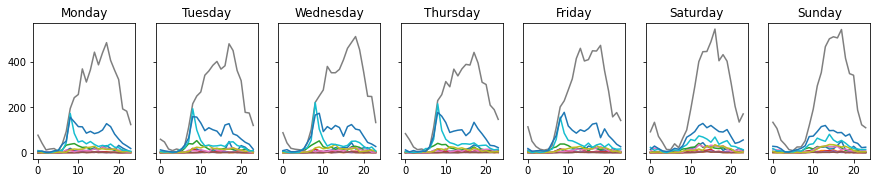

In [146]:
fig, axs = plt.subplots(1, 7, figsize=(15,2.5), sharey = True)
#note that at some point here arrivals are flipped with departures
for key, val in daily_dict.items():
    plot_hours_of_day(axs, key, val)

In [79]:
plt.show()

In [ ]:


def plot_neighborhood(neightborhood_tuple):
    #plot just one neighborhood
    arrivals, departures = neightborhood_tuple

    ordered_arrivals = order_nested_dict(arrivals)
    ordered_departures = order_nested_dict(departures)

    for key, val in ordered_arrivals.items():
        d



    

In [ ]:
def plot_

In [ ]:
plot_neighborhood(oakland)